In [2]:
import pandas as pd
import pickle
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns

/Users/cyriljulliard/simplon/Movie_Popularity_Prediction/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data_allocine = pd.read_pickle("datasets/dataset.pkl")


In [4]:
data = data_allocine
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 1 to 5239
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nationalite     491 non-null    int64 
 1   studio          491 non-null    object
 2   timing          491 non-null    int64 
 3   title           491 non-null    object
 4   titre_original  491 non-null    object
 5   entrees_fr      491 non-null    int64 
 6   num_actors      491 non-null    int64 
 7   actor_1         485 non-null    object
 8   actor_2         485 non-null    object
 9   actor_3         479 non-null    object
 10  num_director    491 non-null    int64 
 11  director_1      491 non-null    object
 12  director_2      484 non-null    object
 13  director_3      245 non-null    object
dtypes: int64(5), object(9)
memory usage: 57.5+ KB


    nationalite                                     studio  timing  \
1             0                                    Tandem       99   
2             1   Universal Pictures International France      118   
5             2                       Warner Bros. France      166   
7             3                                       SND      109   
12            3                               StudioCanal      100   

                     title         titre_original  entrees_fr  num_actors  \
1       La Salle des profs       Das Lehrerzimmer       90612           3   
2   Il reste encore demain      C'è ancora domani      145340           3   
5   Dune : Deuxième Partie         Dune: Part Two     1383999           3   
7                  Une vie               One Life      456390           3   
12   Scandaleusement vôtre  Wicked Little Letters       51921           3   

              actor_1             actor_2                  actor_3  \
1      Leonie Benesch     Michael Klammer     

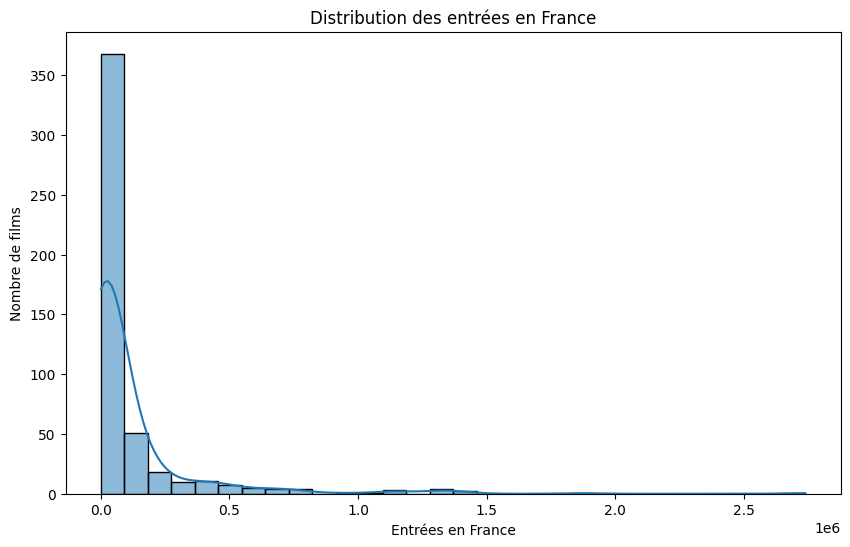

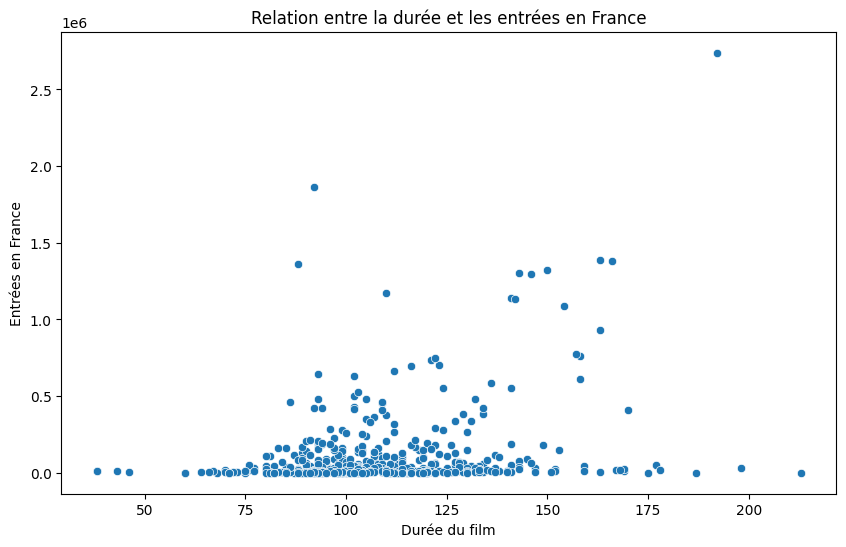

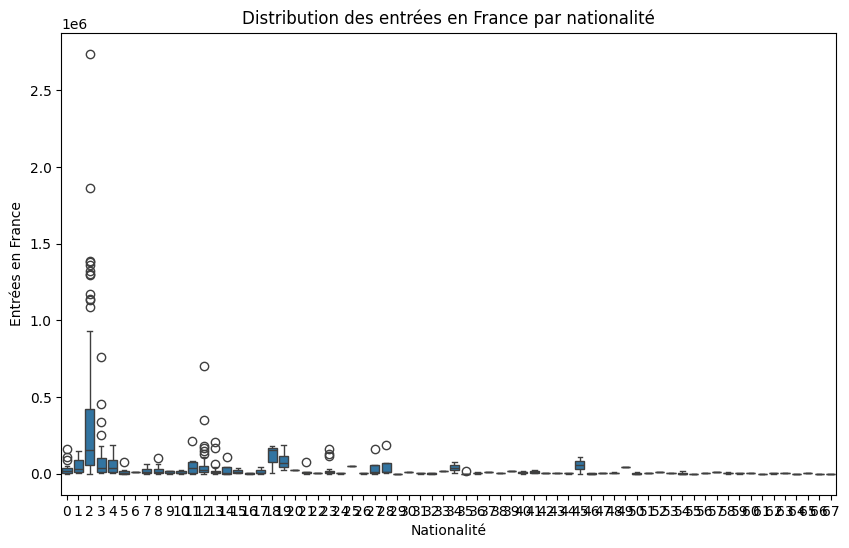

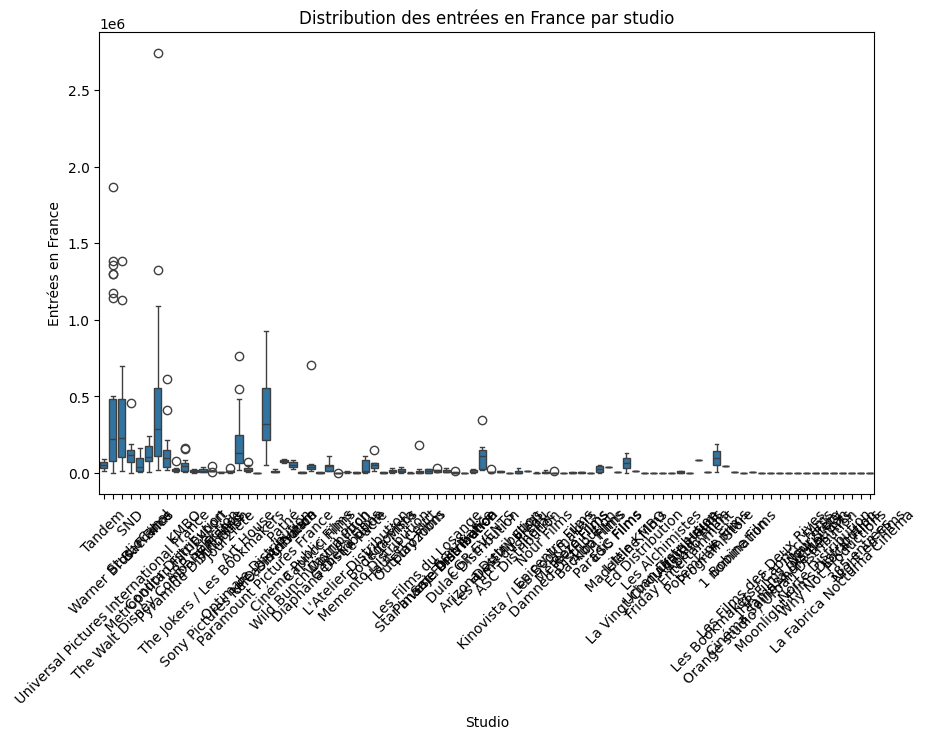

In [5]:
# Afficher les premières lignes du dataset
print(data.head())

# Informations sur les types de données et les valeurs manquantes
print(data.info())

# Statistiques descriptives
print(data.describe())

# Distribution de la variable cible
plt.figure(figsize=(10, 6))
sns.histplot(data['entrees_fr'], bins=30, kde=True)
plt.title('Distribution des entrées en France')
plt.xlabel('Entrées en France')
plt.ylabel('Nombre de films')
plt.show()

# Relation entre la variable cible et d'autres variables potentiellement intéressantes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='timing', y='entrees_fr', data=data)
plt.title('Relation entre la durée et les entrées en France')
plt.xlabel('Durée du film')
plt.ylabel('Entrées en France')
plt.show()

# Boxplot pour visualiser la distribution des entrées en France par nationalité
plt.figure(figsize=(10, 6))
sns.boxplot(x='nationalite', y='entrees_fr', data=data)
plt.title('Distribution des entrées en France par nationalité')
plt.xlabel('Nationalité')
plt.ylabel('Entrées en France')
plt.show()

# Relation entre la variable cible et d'autres variables catégoriques
plt.figure(figsize=(10, 6))
sns.boxplot(x='studio', y='entrees_fr', data=data)
plt.title('Distribution des entrées en France par studio')
plt.xlabel('Studio')
plt.ylabel('Entrées en France')
plt.xticks(rotation=45)
plt.show()


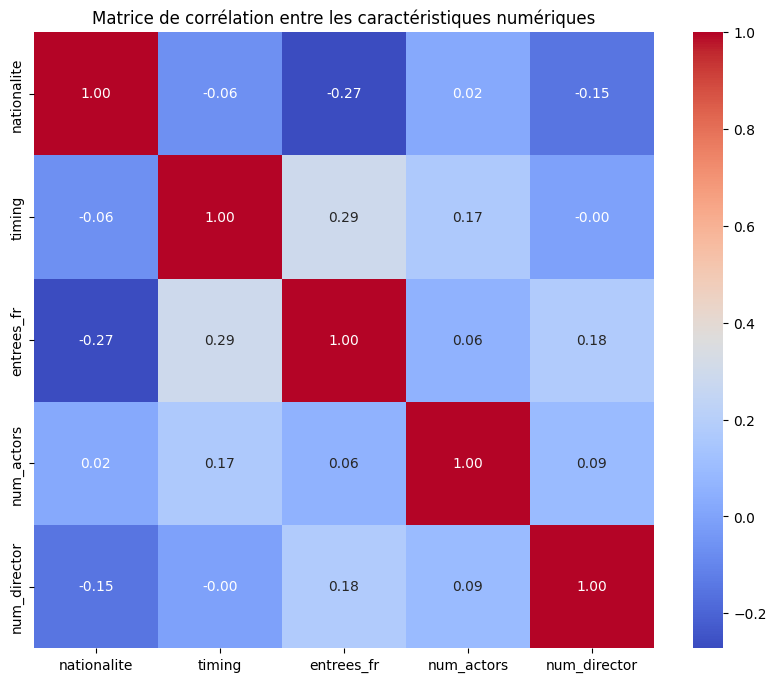

In [6]:
# Supprimer les colonnes non numériques (par exemple, les colonnes contenant des chaînes de caractères)
numeric_data = data.select_dtypes(include=['number'])

# Calculer la matrice de corrélation
correlation_matrix = numeric_data.corr()

# Afficher le heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation entre les caractéristiques numériques')
plt.show()

In [8]:
# nombre d'acteur
# Concaténer les colonnes actor_1, actor_2 et actor_3 en une seule colonne
actors = pd.concat([data['actor_1'], data['actor_2'], data['actor_3']], ignore_index=True)

# Compter le nombre d'acteurs uniques
num_unique_actors = len(actors.unique())

print("Nombre d'acteurs différents :", num_unique_actors)


Nombre d'acteurs différents : 1308


In [13]:
# nombre de director
# Concaténer les colonnes actor_1, actor_2 et actor_3 en une seule colonne
directors = pd.concat([data['director_1'], data['director_2'], data['director_3']], ignore_index=True)

# Compter le nombre d'acteurs uniques
num_unique_directors = len(directors.unique())
print(directors.unique())
print("Nombre de directors différents :", num_unique_directors)


['İlker Çatak' 'Paola Cortellesi' 'Denis Villeneuve' 'James Hawes'
 'Thea Sharrock' 'Jonathan Glazer' 'Yorgos Lanthimos' 'Michael Mohan'
 'Andrew Haigh' 'Terence Davies' 'Tian Xiaopeng' 'Amjad Al Rasheed'
 'Ali Asgari' 'Jason Yu' 'DK Welchman' 'Claudia Huaiquimilla'
 'Veerle Baetens' 'Jim Capobianco' 'Kenneth Branagh' 'Haruo Sotozaki'
 'Kei Ishikawa' 'Matt Carter (II)' 'Chris Buck' 'Aaron Nee' 'Ben Wheatley'
 'Estibaliz Urresola Solaguren' 'Agnieszka Holland' 'Celine Song'
 'Alexander Payne' 'Sean Durkin' 'Timm Kröger' 'Matteo Garrone'
 'Marco Bellocchio' 'Ridley Scott' 'Lucy Izzard' 'Hayao Miyazaki'
 'Neill Blomkamp' 'Hong Sang-Soo' 'Aki Kaurismäki' 'Jumpei Matsumoto'
 'Karla Nor Holmbäck' 'Vasilis Katsoupis' 'Hirokazu Kore-eda'
 'Nuri Bilge Ceylan' 'Zihan Geng' 'Blitz Bazawule' 'James Wan' 'Ti West'
 'Antoine Fuqua' 'Peter Sohn' 'André Øvredal' 'Januel P. Mercado'
 'Joaquim Dos Santos' 'Damián Szifron' 'Christopher McQuarrie'
 'Matthew Vaughn' 'Olivia Newman' 'Chloé Zhao' 'Andrea Di 

In [11]:
# nombre de studio

# Compter le nombre d'acteurs uniques
num_unique_studio = len(data['studio'].unique())

print("Nombre de studio différents :", num_unique_studio)


Nombre de studio différents : 86


In [9]:
display(data)

,nationalite,studio,timing,title,titre_original,entrees_fr,num_actors,actor_1,actor_2,actor_3,num_director,director_1,director_2,director_3
1,0,Tandem,99,La Salle des profs,Das Lehrerzimmer,90612,3,Leonie Benesch,Michael Klammer,Rafael Stachowiak,3,İlker Çatak,İlker Çatak,Johannes Duncker
2,1,Universal Pictures International France,118,Il reste encore demain,C'è ancora domani,145340,3,Paola Cortellesi,Valerio Mastandrea,Romana Maggiora Vergano,3,Paola Cortellesi,Paola Cortellesi,Furio Andreotti
5,2,Warner Bros. France,166,Dune : Deuxième Partie,Dune: Part Two,1383999,3,Timothée Chalamet,Zendaya,Rebecca Ferguson,3,Denis Villeneuve,Denis Villeneuve,Jon Spaihts
7,3,SND,109,Une vie,One Life,456390,3,Anthony Hopkins,Johnny Flynn,Helena Bonham Carter,3,James Hawes,Lucinda Coxon,Nick Drake
12,3,StudioCanal,100,Scandaleusement vôtre,Wicked Little Letters,51921,3,Olivia Colman,Jessie Buckley,Anjana Vasan,2,Thea Sharrock,Jonny Sweet,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4703,2,\n385 entrées\n,60,"Barbie : Grande Ville, Grands Rêves","Barbie: Big City, Big Dreams",391,3,America Young,Greg Chun,Kirsten Day,3,Scott Pleydell-Pearce,Christopher Keenan,Kate Splaine
4812,5,ASC Distribution,104,Grand frère,Wisdom Tooth,414,3,Lu Celeste,Wu Xiaoliang,Jiajia Wang,2,Liang Ming,Liang Ming,None
4948,50,Les Films du Losange,102,Oskar et Lily,Ein bisschen bleiben wir noch,1324,3,Leopold Pallua,Rosa Zant,Anna Fenderl,2,Arash T. Riahi,Arash T. Riahi,None
4988,23,Cinéma Saint-André des Arts,88,Le Voyage d'Ana,El Viaje de Ana,108,3,Astrid Adverbe,Dimitra Kontou,Maritza Gonzalez,2,Pamela Varela,Pamela Varela,None
